Raw scraped data:
                   title          company           location  \
0         Data Scientist   Acme Analytics       New York, NY   
1           Data Analyst  Bright Insights  San Francisco, CA   
2            ML Engineer         VisionAI         Austin, TX   
3  Business Data Analyst        Northwind       New York, NY   
4     Analytics Engineer        DataWorks        Seattle, WA   

                                        skills         posted_raw  
0      [Python, SQL, Machine Learning, Pandas]  Posted 2 days ago  
1            [SQL, Excel, Tableau, Statistics]   Posted 1 day ago  
2  [Python, TensorFlow, Deep Learning, Docker]       Posted today  
3        [SQL, Power BI, Excel, Communication]  Posted 5 days ago  
4                  [dbt, SQL, Python, Airflow]  Posted 3 days ago  

Cleaned data:
                   title          company           city  \
0         Data Scientist   Acme Analytics       New York   
1           Data Analyst  Bright Insights  San Francis

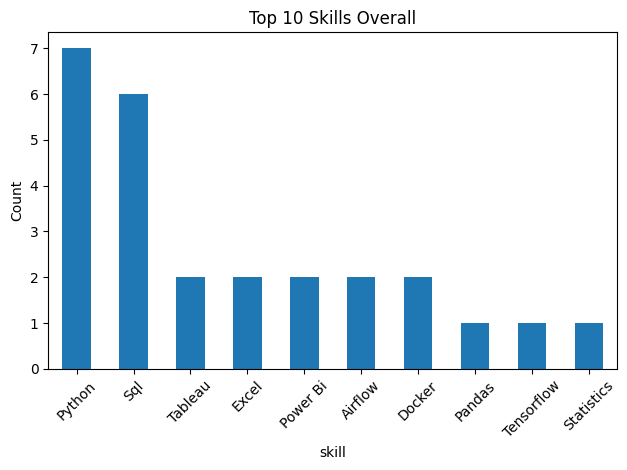

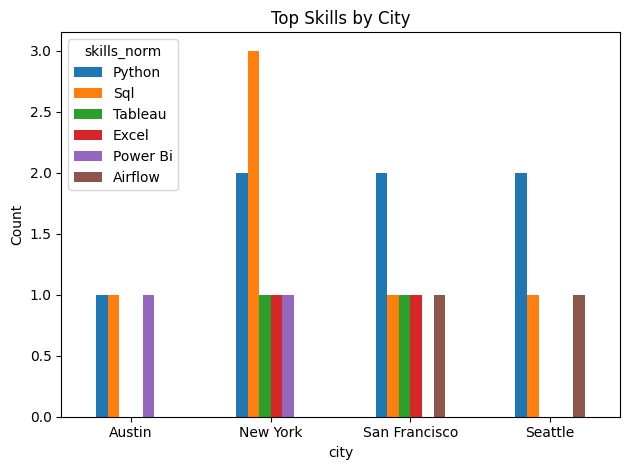

In [1]:
# ============================
# Task 6: Web Scraping and Analysis of Job Postings
# ============================

from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pyplot as plt

# ---------------------------
# Step 1: Simulated HTML Page (Static)
# ---------------------------
html_content = """
<!DOCTYPE html>
<html>
<body>
  <div class="job-card">
    <h2 class="title">Data Scientist</h2>
    <div class="company">Acme Analytics</div>
    <div class="location">New York, NY</div>
    <ul class="skills">
      <li>Python</li><li>SQL</li><li>Machine Learning</li><li>Pandas</li>
    </ul>
    <div class="posted">Posted 2 days ago</div>
  </div>

  <div class="job-card">
    <h2 class="title">Data Analyst</h2>
    <div class="company">Bright Insights</div>
    <div class="location">San Francisco, CA</div>
    <ul class="skills">
      <li>SQL</li><li>Excel</li><li>Tableau</li><li>Statistics</li>
    </ul>
    <div class="posted">Posted 1 day ago</div>
  </div>

  <div class="job-card">
    <h2 class="title">ML Engineer</h2>
    <div class="company">VisionAI</div>
    <div class="location">Austin, TX</div>
    <ul class="skills">
      <li>Python</li><li>TensorFlow</li><li>Deep Learning</li><li>Docker</li>
    </ul>
    <div class="posted">Posted today</div>
  </div>

  <div class="job-card">
    <h2 class="title">Business Data Analyst</h2>
    <div class="company">Northwind</div>
    <div class="location">New York, NY</div>
    <ul class="skills">
      <li>SQL</li><li>Power BI</li><li>Excel</li><li>Communication</li>
    </ul>
    <div class="posted">Posted 5 days ago</div>
  </div>

  <div class="job-card">
    <h2 class="title">Analytics Engineer</h2>
    <div class="company">DataWorks</div>
    <div class="location">Seattle, WA</div>
    <ul class="skills">
      <li>dbt</li><li>SQL</li><li>Python</li><li>Airflow</li>
    </ul>
    <div class="posted">Posted 3 days ago</div>
  </div>

  <div class="job-card">
    <h2 class="title">Data Scientist</h2>
    <div class="company">HealthQ</div>
    <div class="location">San Francisco, CA</div>
    <ul class="skills">
      <li>Python</li><li>R</li><li>Scikit-learn</li><li>A/B Testing</li>
    </ul>
    <div class="posted">Posted 4 days ago</div>
  </div>

  <div class="job-card">
    <h2 class="title">BI Developer</h2>
    <div class="company">Riverton</div>
    <div class="location">Austin, TX</div>
    <ul class="skills">
      <li>SQL</li><li>ETL</li><li>Power BI</li><li>Data Modeling</li>
    </ul>
    <div class="posted">Posted today</div>
  </div>

  <div class="job-card">
    <h2 class="title">NLP Engineer</h2>
    <div class="company">LinguaTech</div>
    <div class="location">Seattle, WA</div>
    <ul class="skills">
      <li>Python</li><li>PyTorch</li><li>NLP</li><li>Docker</li>
    </ul>
    <div class="posted">Posted 1 day ago</div>
  </div>

  <div class="job-card">
    <h2 class="title">Product Data Analyst</h2>
    <div class="company">Acme Analytics</div>
    <div class="location">New York, NY</div>
    <ul class="skills">
      <li>SQL</li><li>Tableau</li><li>AB Testing</li><li>Python</li>
    </ul>
    <div class="posted">Posted 2 days ago</div>
  </div>

  <div class="job-card">
    <h2 class="title">Data Engineer</h2>
    <div class="company">Bright Insights</div>
    <div class="location">San Francisco, CA</div>
    <ul class="skills">
      <li>Python</li><li>Spark</li><li>AWS</li><li>Airflow</li>
    </ul>
    <div class="posted">Posted 6 days ago</div>
  </div>
</body>
</html>
"""

# ---------------------------
# Step 2: Scrape with BeautifulSoup
# ---------------------------
soup = BeautifulSoup(html_content, "html.parser")
job_cards = soup.select(".job-card")

records = []
for card in job_cards:
    title = card.select_one(".title").get_text(strip=True)
    company = card.select_one(".company").get_text(strip=True)
    location = card.select_one(".location").get_text(strip=True)
    posted = card.select_one(".posted").get_text(strip=True)
    skills = [li.get_text(strip=True) for li in card.select(".skills li")]
    records.append({"title": title, "company": company, "location": location,
                    "skills": skills, "posted_raw": posted})

df = pd.DataFrame(records)
print("Raw scraped data:")
print(df.head())

# ---------------------------
# Step 3: Clean & Normalize
# ---------------------------
def normalize_city(text):
    return text.split(",")[0].strip()

def normalize_posted(text):
    text = text.lower()
    if "today" in text:
        return 0
    m = re.search(r"(\d+)\s+day", text)
    return int(m.group(1)) if m else None

df["city"] = df["location"].apply(normalize_city)
df["days_since_post"] = df["posted_raw"].apply(normalize_posted)
df["skills_norm"] = df["skills"].apply(lambda lst: [s.strip().title() for s in lst])

print("\nCleaned data:")
print(df[["title", "company", "city", "skills_norm", "days_since_post"]].head())

# ---------------------------
# Step 4: Skill Frequency Analysis
# ---------------------------
exploded = df.explode("skills_norm")[["title", "city", "skills_norm"]]
skill_counts = exploded["skills_norm"].value_counts().reset_index()
skill_counts.columns = ["skill", "count"]

print("\nSkill frequency:")
print(skill_counts.head(10))

# ---------------------------
# Step 5: Bonus - Skills by City
# ---------------------------
by_city = exploded.groupby(["city", "skills_norm"]).size().reset_index(name="count")
pivot = by_city.pivot(index="city", columns="skills_norm", values="count").fillna(0).astype(int)

print("\nSkills by City (pivot):")
print(pivot)

# ---------------------------
# Step 6: Visualizations
# ---------------------------
# Top 10 skills overall
skill_counts.head(10).plot(kind="bar", x="skill", y="count",
                           legend=False, title="Top 10 Skills Overall")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Skills by city (for top global skills)
top_skills = skill_counts.head(6)["skill"].tolist()
pivot[top_skills].plot(kind="bar", title="Top Skills by City")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
